# Using Built In Perceptron Using sklearn And Using Perceptron Alogrithm From Scratch

Results for Perceptron:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


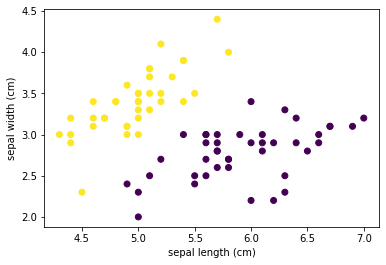

Results for PerceptronScratch:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0


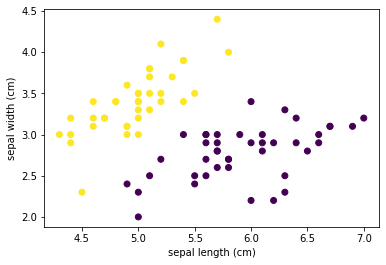

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

iris = load_iris()

df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

df = df[df.target != 2]

df.target = (df.target == 0).astype(int)

X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df.target, test_size=0.2, random_state=42)

clf_sklearn = Perceptron() #PERCEPTRON OBJECT

clf_sklearn.fit(X_train, y_train)

y_pred_sklearn = clf_sklearn.predict(X_test)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)
f1_sklearn = f1_score(y_test, y_pred_sklearn)

print("Results for Perceptron:")
print("Accuracy:", accuracy_sklearn)
print("Precision:", precision_sklearn)
print("Recall:", recall_sklearn)
print("F1 score:", f1_sklearn)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

class PerceptronScratch: #PERCEPTRONS ALGORITHM FROM SCRATCH
    
    def __init__(self, learning_rate=0.1, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features + 1)
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        for i in range(self.n_iterations):
            for j in range(n_samples):
                y_pred = self.predict_single(X[j])
                error = y[j] - y_pred
                self.weights += self.learning_rate * error * X[j]
        
    def predict_single(self, x):
        return 1 if np.dot(x, self.weights) >= 0 else 0

clf_scratch = PerceptronScratch() #PERCEPTRON OBJECT

clf_scratch.fit(X_train.values, y_train.values)

X_test_scratch = np.concatenate([X_test, np.ones((X_test.shape[0], 1))], axis=1)
y_pred_scratch = [clf_scratch.predict_single(x) for x in X_test_scratch]

accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
precision_scratch = precision_score(y_test, y_pred_scratch)
recall_scratch = recall_score(y_test, y_pred_scratch)
f1_scratch = f1_score(y_test, y_pred_scratch)

print("Results for PerceptronScratch:")
print("Accuracy:", accuracy_scratch)
print("Precision:", precision_scratch)
print("Recall:", recall_scratch)
print("F1 score:", f1_scratch)

plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()